In [1]:
import pymysql
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
from datetime import timedelta
import scipy.stats as sps

In [26]:
data = pd.read_csv('result1.csv')
data = data.replace(to_replace='None', value=np.nan).dropna()

In [50]:
data.shape

(2209, 6)

In [48]:
data.tail()

,cve,vu_id,public_date,published_date,updated_date,lag
2841,CVE-2000-0673,VU#32650,2000-09-26,2000-07-27,11/29/2000,61 days
2842,CVE-2000-0482,VU#35958,2000-09-26,2000-06-05,4/5/2001,113 days
2844,CVE-2000-0892,VU#22404,2000-09-26,2000-09-26,10/25/2001,0 days
2846,CVE-2000-0201,VU#25249,2000-09-26,2000-03-01,4/12/2004,209 days
2847,CVE-2000-0891,VU#5962,2000-09-26,1997-08-15,6/26/2001,1138 days


In [27]:
data['public_date'] = pd.to_datetime(data['public_date'])
data['published_date'] = pd.to_datetime(data['published_date'])

In [28]:
data['lag'] = abs(data['public_date'] - data['published_date'])

In [29]:
lag = data['lag']
df = pd.DataFrame(lag, columns=['lag'])

In [30]:
stats_df = df.groupby('lag')['lag'].agg('count').pipe(pd.DataFrame).rename(columns={'lag':'frequency'})

In [31]:
stats_df['pdf'] = stats_df['frequency']/sum(stats_df['frequency'])

In [32]:
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()

In [49]:
stats_df.head()

,lag,frequency,pdf,cdf
0,0 days,625,0.282933,0.282933
1,1 days,327,0.148031,0.430964
2,2 days,207,0.093708,0.524672
3,3 days,61,0.027614,0.552286
4,4 days,48,0.021729,0.574015


[Text(-50.0, 0, '572 days'),
 Text(0.0, 0, '0 days'),
 Text(50.0, 0, '50 days'),
 Text(100.0, 0, '109 days'),
 Text(150.0, 0, '187 days'),
 Text(200.0, 0, '315 days'),
 Text(250.0, 0, '523 days'),
 Text(300.0, 0, '1937 days'),
 Text(350.0, 0, 's')]

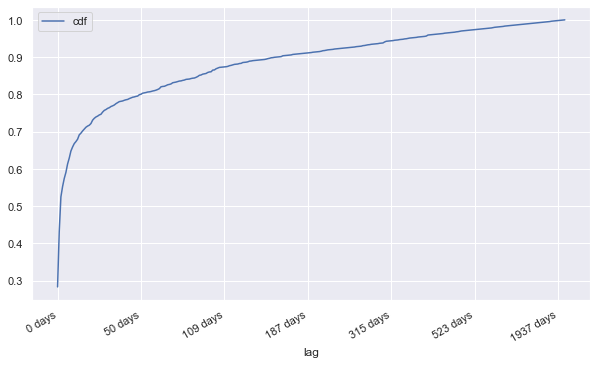

In [43]:
from matplotlib.dates import DateFormatter
#stats_df['lag'] = stats_df['lag'].dt.days
sns.set(rc = {'figure.figsize':(10,6)})
ax = stats_df.plot(x = 'lag', y = ['cdf'], grid = True)
ax.set_xticklabels([t.get_text().split("s")[0]+'s' for t in ax.get_xticklabels()])

In [53]:
stats_df.columns.dt

Index(['lag', 'frequency', 'pdf', 'cdf'], dtype='object')

In [75]:
final_data = stats_df[['lag', 'frequency']]
final_data['lag'] = final_data['lag'].dt.days.astype('int16')
final_data['cum_freq'] = final_data.frequency.cumsum()
final_data.tail()

<ipython-input-75-72222c131011>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-75-72222c131011>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,lag,frequency,cum_freq
300,1937,1,2205
301,2242,1,2206
302,3638,1,2207
303,3744,1,2208
304,4321,1,2209


<AxesSubplot:xlabel='lag', ylabel='cum_freq'>

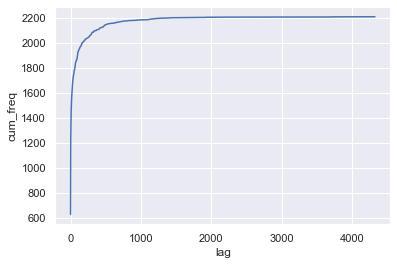

In [80]:
sns.lineplot(x='lag', y='cum_freq', data=final_data)

In [81]:
data = pd.read_csv('cvesource.csv')

In [82]:
data.head()

,Unnamed: 0,cve,source
0,0,CVE-2007-2932,MITRE
1,1,CVE-2009-2265,MITRE
2,2,CVE-2009-5155,MITRE
3,3,CVE-2010-1432,"Red Hat, Inc."
4,4,CVE-2010-1433,"Red Hat, Inc."


In [90]:
stats = data.groupby('source').agg('count').pipe(pd.DataFrame).rename(columns={'cve':'frequency'})

In [91]:
stats['percent'] = (stats['frequency']/sum(stats['frequency'])*100)

In [92]:
stats= stats.reset_index()

In [93]:
stats.head()

,source,Unnamed: 0,frequency,percent
0,Apple Inc.,1,1,0.333333
1,CERT/CC,1,1,0.333333
2,Debian GNU/Linux,1,1,0.333333
3,JPCERT/CC,2,2,0.666667
4,MITRE,33,33,11.000000


In [94]:
stats.shape

(8, 4)

<AxesSubplot:xlabel='source', ylabel='percent'>

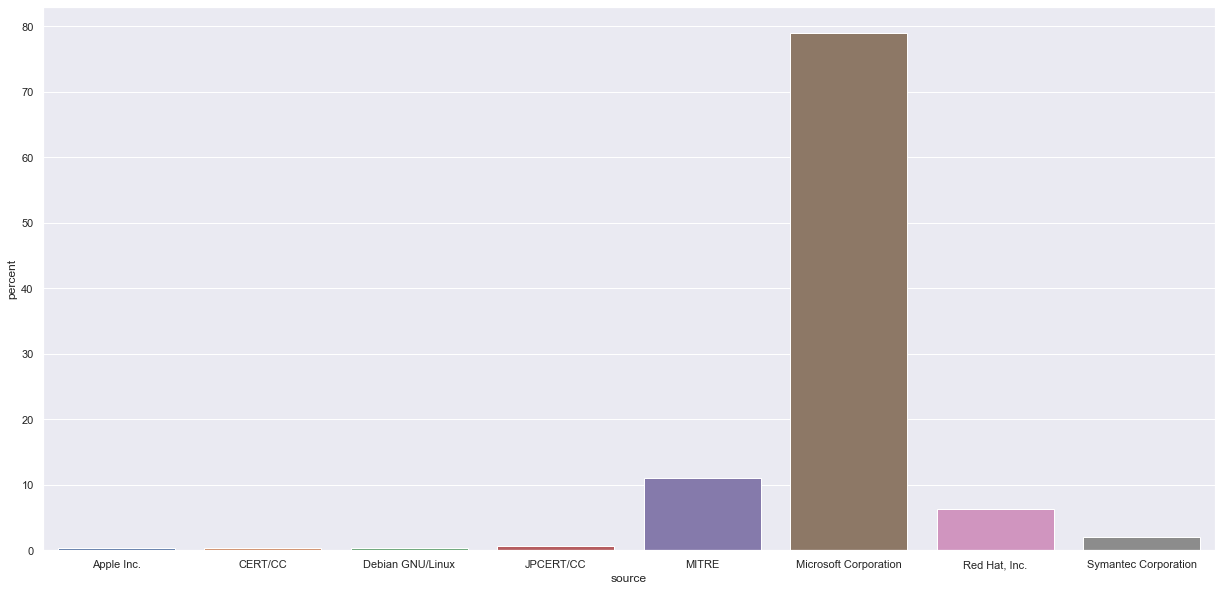

In [96]:
plt.figure(figsize=(21, 10))
sns.barplot(data=stats, x='source', y='percent')

In [99]:
data = pd.read_csv('cvesource2.csv')
stats = data.groupby('source').agg('count').pipe(pd.DataFrame).rename(columns={'cve':'frequency'})
stats['percent'] = (stats['frequency']/sum(stats['frequency'])*100)
stats= stats.reset_index()

In [100]:
stats.shape

(31, 4)

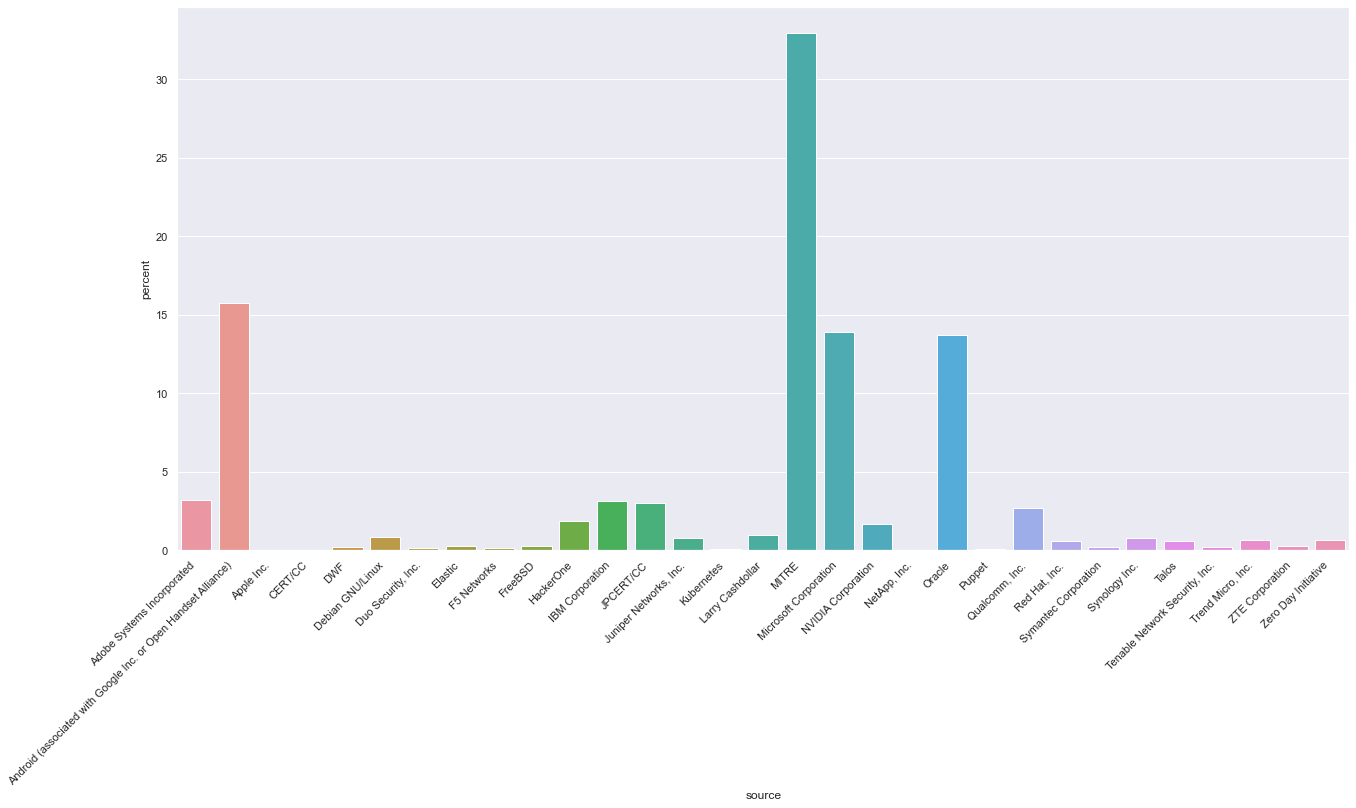

In [102]:
plt.figure(figsize=(21, 10))
chart = sns.barplot(data=stats, x='source', y='percent')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
None